In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [25]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [26]:
print(df['crim'].mean())
print(df['crim'].median())
print(df['crim'].std())

3.360341471471471
0.26169000000000003
7.352271836781107


In [27]:
print(df['indus'].mean())
print(df['indus'].median())
print(df['indus'].std())

11.293483483483483
9.9
6.998123104477312


In [28]:
print(df['tax'].mean())
print(df['tax'].median())
print(df['tax'].std())

409.27927927927925
330.0
170.84198846058234


In [30]:
#These two subsets represent high and low access to radial highways.
#Access to highways may influence things like property value, polluiton, 
#or proximity to business 

high_rad = df.loc[df['rad']>=5]
low_rad = df.loc[df['rad']<5]

In [35]:
#These two subsets represt high and low concetration of nitrogen oxides
#Pollution is found to have some correlation to health, wealth attainment, and crime
#I expect crime to generally be higher in high nox areas, and proprty value
#and ownership to be lower

high_nox = df.loc[df['nox'] > (df['nox'].quantile(.5))]
low_nox = df.loc[df['nox'] < (df['nox'].quantile(.5))]


In [46]:
#These two subsets represt the top 10% of residential lad zoned for lots
#over 25k sq.ft. - The median and mean for this sereis are very far apart
#and I suspect that we will see similar trends in other fields like crime 
# polution, and student/teacher ratio

rich_zn = df.loc[df['zn'] > (df['zn'].quantile(.9))]
rest_zn = df.loc[df['zn'] < (df['zn'].quantile(.9))]

In [71]:
df.loc[df['zn']>(df['zn'].quantile(.9)), "rich_nbrhd"] = 'rich'
df.loc[df['zn']<(df['zn'].quantile(.9)), "rich_nbrhd"] = 'rest'


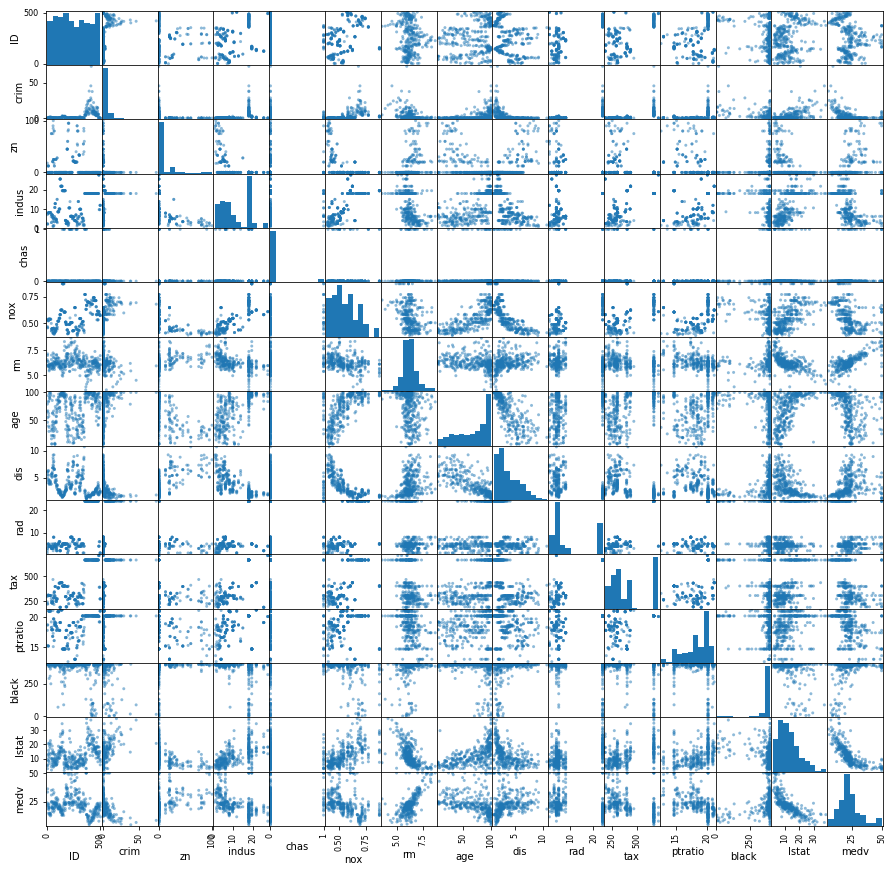

In [52]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

# Looking into Rad

Text(0, 0.5, 'Number of houses')

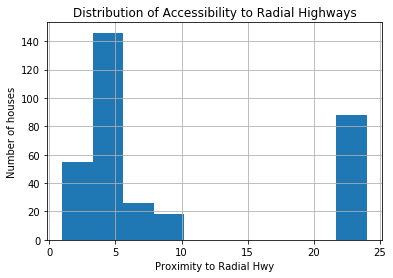

In [55]:
df.rad.hist()
plt.title('Distribution of Accessibility to Radial Highways')
plt.xlabel('Proximity to Radial Hwy')
plt.ylabel('Number of houses')

 Assuming that a high number in this category indicates accessibilty to a hwy, most homes do not have great access to the hwy

Text(0, 0.5, 'Number of houses')

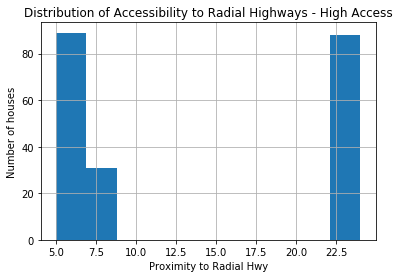

In [62]:
high_rad.rad.hist()
plt.title('Distribution of Accessibility to Radial Highways - High Access')
plt.xlabel('Proximity to Radial Hwy')
plt.ylabel('Number of houses')


Text(0, 0.5, 'Number of houses')

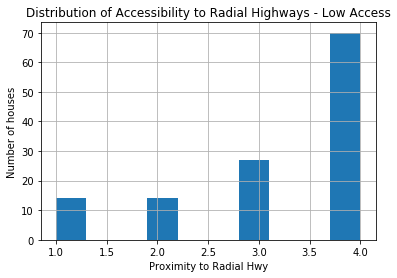

In [60]:
low_rad.rad.hist()
plt.title('Distribution of Accessibility to Radial Highways - Low Access')
plt.xlabel('Proximity to Radial Hwy')
plt.ylabel('Number of houses')

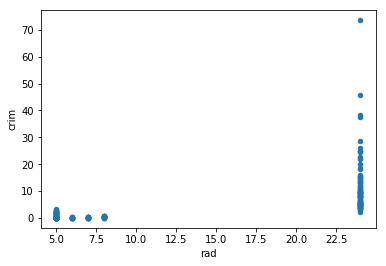

In [67]:
high_rad.plot('rad', 'crim', kind='scatter')

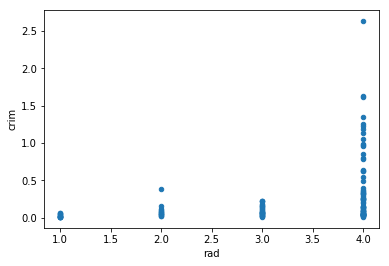

In [68]:
low_rad.plot('rad', 'crim', kind='scatter')

Here we see that incidences of crime seem similarly distributed, but it should be noted that for high_rad houses the range of crime is significantly greater, possibly suggesting that greater accessibilty to the hwy also comes with increased incedences of crime. 